In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

> Suppose that consumption growth has lognormal distribution with the possibility of rare disasters:

$$ \ln g = 0.02 + 0.02 \epsilon + \nu$$

> Here ε is a standard normal random variable, while v is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%).

In [2]:
# Lets randomly draw values of epsilon from standard normal distribution and values of nu from 
# uniform distribution

epsilon = []
nu = []

for i in range(0,10000):
    epsilon.append(np.random.standard_normal())
    
    temp = np.random.uniform()
    
    if (temp <= 0.017):
        nu.append(np.log(0.65)) # 0.65 comes from historical survey
    else:
        nu.append(0)

In [3]:
# Lets calculate the simulated distribution of comsumption growth

log_g = [0.02 + 0.02 * epsilon[i] + nu[i] for i in range(len(epsilon))]

> Use the simulated distribution of consumption growth to find the simulated distribution of the pricing kernel for power utility and Repeat this process for values of γ in the range from 1 to 4, in increments of 0.1 (or less):

$$ M = 0.99 g^{-\gamma} $$

> Calculate μM and σM for each value of γ, and plot σM/μM (on the vertical axis) vs γ (on the horizontal axis).

In [4]:
consumption_growth = np.exp(log_g)

In [5]:
gamma = np.linspace(1,4,50) # approximate increment of 0.07

# mean and std of each distribution of Power utility function
mean = []
std = []

for i in range(len(gamma)):
    power_utility = 0.99 * consumption_growth**(-gamma[i])
    
    mean.append(power_utility.mean())
    
    std.append(power_utility.std())    

In [6]:
ratio = np.divide(std, mean)

> Find the smallest value of γ (in your data) for which σM/μM > 0.4

In [7]:
index = np.argwhere(ratio>0.4)[0] # This is the index value where we have ratio greater than 0.4

In [8]:
gamma[index[0]] #This is the corresponding value of gamma

3.326530612244898

In [11]:
df = pd.DataFrame({'Ratio (σM/μM)': ratio,
                  'Gamma (γ)': gamma},index=range(1,len(gamma)+1))

In [12]:
df

,Ratio (σM/μM),Gamma (γ)
1,0.074524,1.000000
2,0.080077,1.061224
3,0.085764,1.122449
4,0.091586,1.183673
5,0.097547,1.244898
6,0.103651,1.306122
7,0.109901,1.367347
8,0.116301,1.428571
9,0.122854,1.489796
10,0.129563,1.551020


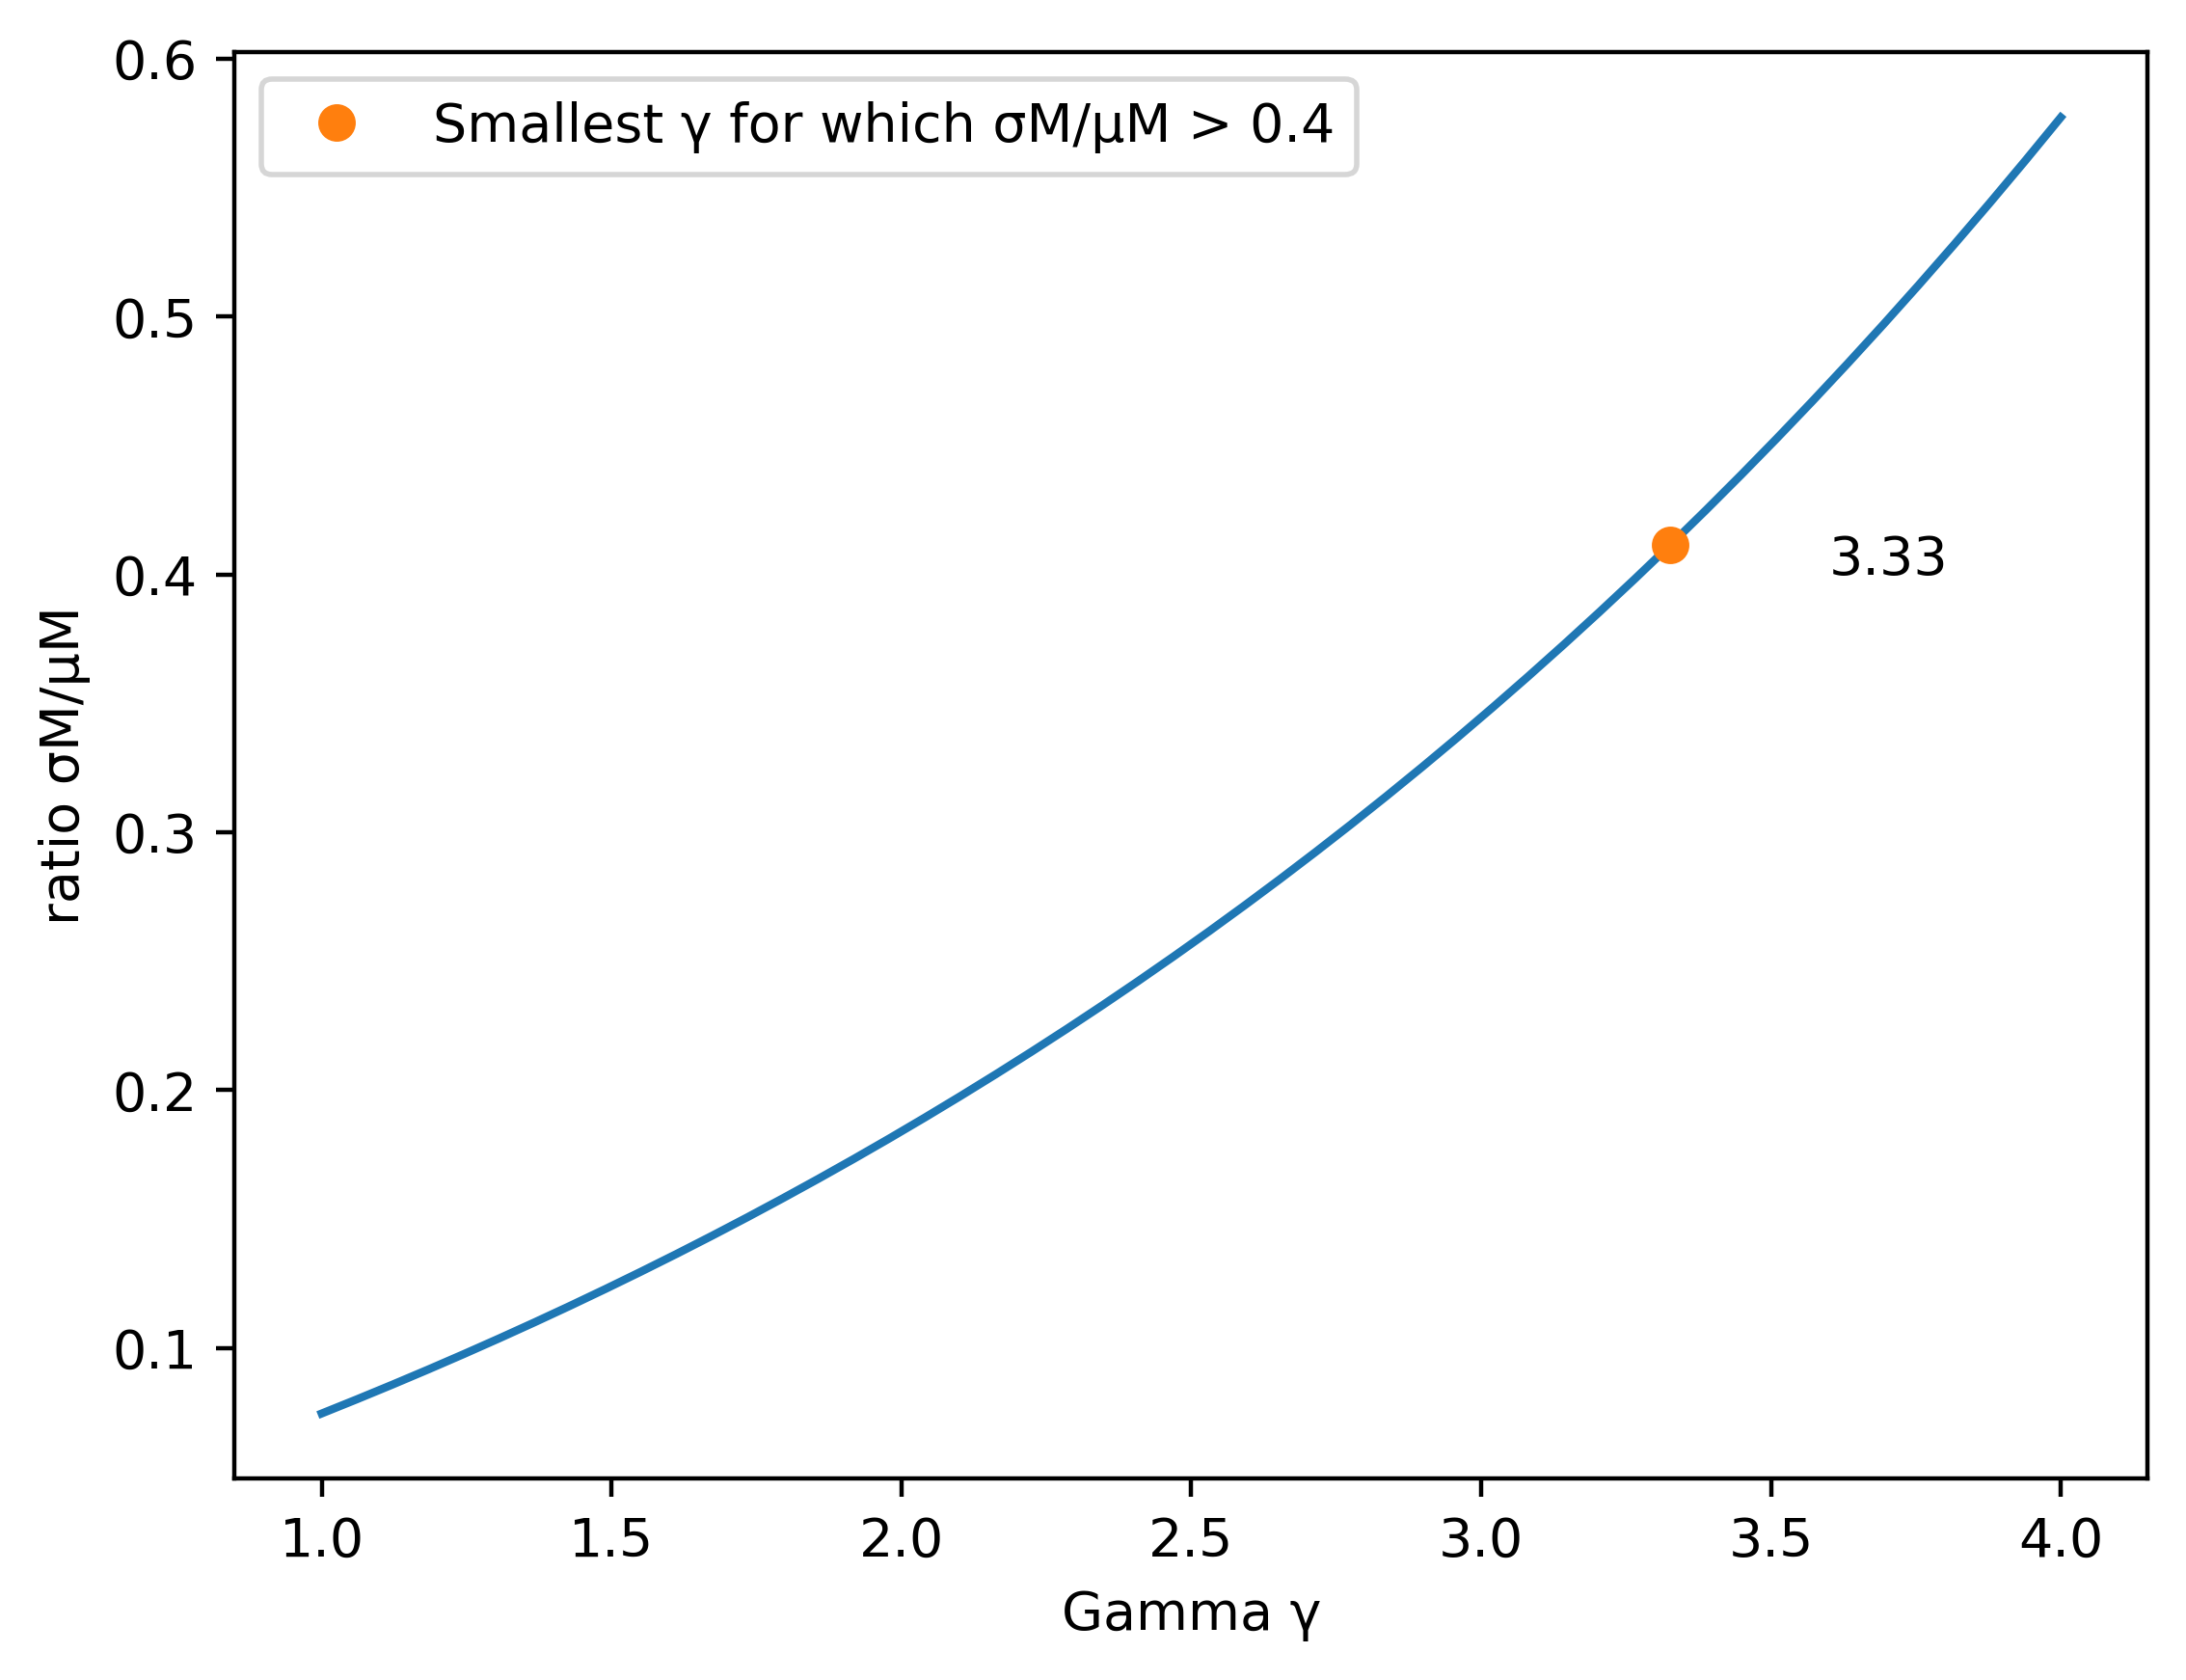

In [9]:
# Plot

plt.figure(dpi=400)

plt.plot(gamma,ratio)
plt.plot(gamma[index[0]],ratio[index],'o',label='Smallest γ for which σM/μM > 0.4')
plt.xlabel('Gamma γ')
plt.ylabel('ratio σM/μM')
plt.title('')
plt.legend()
plt.annotate(round(gamma[index[0]],2),(gamma[index[0]],ratio[index[0]]),(3.6,0.4))

plt.show()

    Risk Aversion and Consumption Growth: High risk aversion can lead to magnified volatility in consumption growth, even if consumption growth itself is stable.

    Skewness in Consumption Growth and Pricing Kernel: Lognormal consumption growth leads to a small amount of negative skewness. This implies that the distribution for the pricing kernel (which reflects how investors value risky assets) will have positive skewness, and this skewness increases with the investor's risk aversion.

    Empirical Evidence: Empirical data suggests that the pricing kernel should have a large amount of positive skewness.

    Understated Volatility and Skewness in Historical Data: Historical data might understate the true volatility and skewness of consumption growth, especially when rare disasters are excluded.

    Application of Results: Barro's estimates and the use of the H-J bound indicate that a risk aversion parameter (γ) of around 3.3 is reasonable for the U.S. stock market, which implies no equity premium puzzle.

    Conclusion: The presence of rare disasters can greatly increase the volatility and negative skewness of consumption growth. This means that only a small degree of risk aversion (represented by γ) is needed to match the characteristics of the pricing kernel.